In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\HP\\OneDrive\\Desktop\\DS course\\Elevate Lab Tasks\\Elevate Labs Task7\\')

SVM (Linear Kernel) Evaluation:
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM (RBF Kernel) Evaluation:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



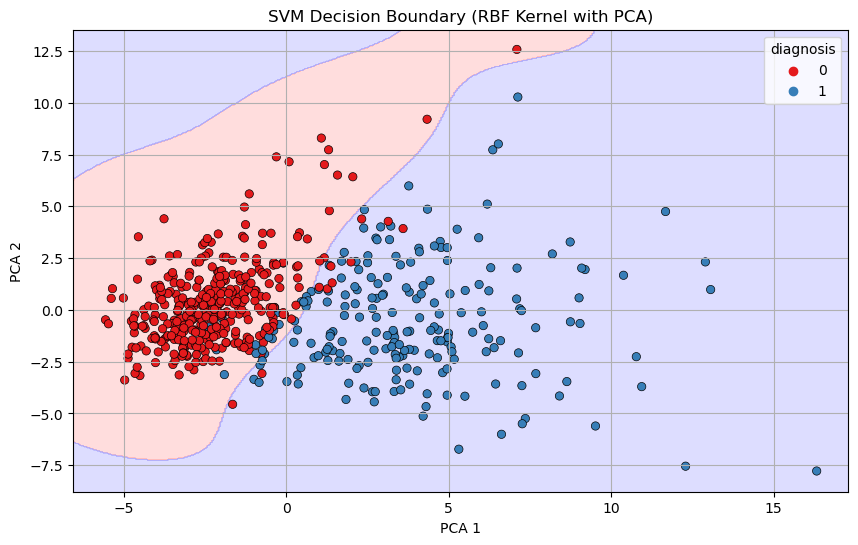

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9789318428815401
Final Cross-Validation Accuracy: 0.9789


In [3]:


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 1. Load and prepare dataset
df = pd.read_csv("breast-cancer.csv")  # Replace with your file name if different

# Drop any irrelevant columns (like ID)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Convert target to binary if it's in string format
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # 0: benign, 1: malignant

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("SVM (Linear Kernel) Evaluation:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# 5. SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("SVM (RBF Kernel) Evaluation:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# 6. Visualize decision boundary (only if we reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model_2d = SVC(kernel='rbf', C=1, gamma=0.1)
model_2d.fit(X_train_pca, y_train_pca)

# Meshgrid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.title("SVM Decision Boundary (RBF Kernel with PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# 7. Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_scaled, y)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# 8. Final evaluation
final_model = grid.best_estimator_
final_scores = cross_val_score(final_model, X_scaled, y, cv=5)
print(f"Final Cross-Validation Accuracy: {final_scores.mean():.4f}")
